In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date

In [2]:
raw_data = pd.ExcelFile(r'C:\Users\adamy\Documents\RFM Analysis\Raw_data.xlsx')
sheet_names = raw_data.sheet_names
sheet_names

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

In [3]:
new_cust = pd.read_excel(r'C:\Users\adamy\Documents\RFM Analysis\Raw_data.xlsx', sheet_name = 'NewCustomerList')

In [4]:
new_cust.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [5]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

The data-types of the feature columns are fine. However **'Unnamed: 16'**, **'Unnamed: 17'**, **'Unnamed: 18'**, **'Unnamed: 19'**, **'Unnamed: 20'** are irrelevent column. Hence it should be dropped.

# Total records

In [6]:
print("Total records (rows) in the dataset: {}".format(new_cust.shape[0]))
print("Total features (columns) in the dataset: {}".format(new_cust.shape[1]))

Total records (rows) in the dataset: 1000
Total features (columns) in the dataset: 23


# Numeric and Non-Numeric Columns

In [7]:
df_numeric = new_cust.select_dtypes(include = [np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are: {}".format(numeric_cols))

df_non_numeric = new_cust.select_dtypes(exclude = [np.number])
non_numeric_cols = df_non_numeric.columns.values
print("\nThe non-numeric columns are: {}".format(non_numeric_cols))

The numeric columns are: ['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']

The non-numeric columns are: ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


# 1. Dropping Irrelevent Columns

In [8]:
new_cust.drop(labels = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis = 1, inplace = True)

# 2. Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [9]:
# Total number of missing values
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [10]:
# Percentage of missing values
new_cust.isnull().mean() * 100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

## 2.1 Last Name

Since All customers have a First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with **"None"**

In [11]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [12]:
new_cust[new_cust['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


In [13]:
new_cust['last_name'].fillna('None', axis = 0, inplace = True)

In [14]:
new_cust['last_name'].isnull().sum()

0

Currently there are no missing values for **'last_name'** column.

## 2.2 Date of Birth

In [15]:
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'])

In [16]:
new_cust[new_cust['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [17]:
round(new_cust['DOB'].isnull().mean()*100)

2

Less than **5%** of data has null **date of birth**. we can remove the records where date of birth is null

In [18]:
dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')

In [19]:
new_cust.drop(index = dob_index_drop, axis = 0, inplace = True)

In [20]:
new_cust['DOB'].isnull().sum()

0

Currently there are no missing values for **'DOB'**.

## Creating "age" Column for checking further descripency in data

In [21]:
today_date = datetime(2017, 12, 31)
today_date

datetime.datetime(2017, 12, 31, 0, 0)

In [22]:
new_cust['age'] = (today_date - new_cust['DOB']).dt.days // 365
new_cust.drop('DOB', axis = 1, inplace = True)
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60
1,Morly,Genery,Male,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47
2,Ardelis,Forrester,Female,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43
3,Lucine,Stutt,Female,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38
4,Melinda,Hadlee,Female,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52


C:\Users\adamy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


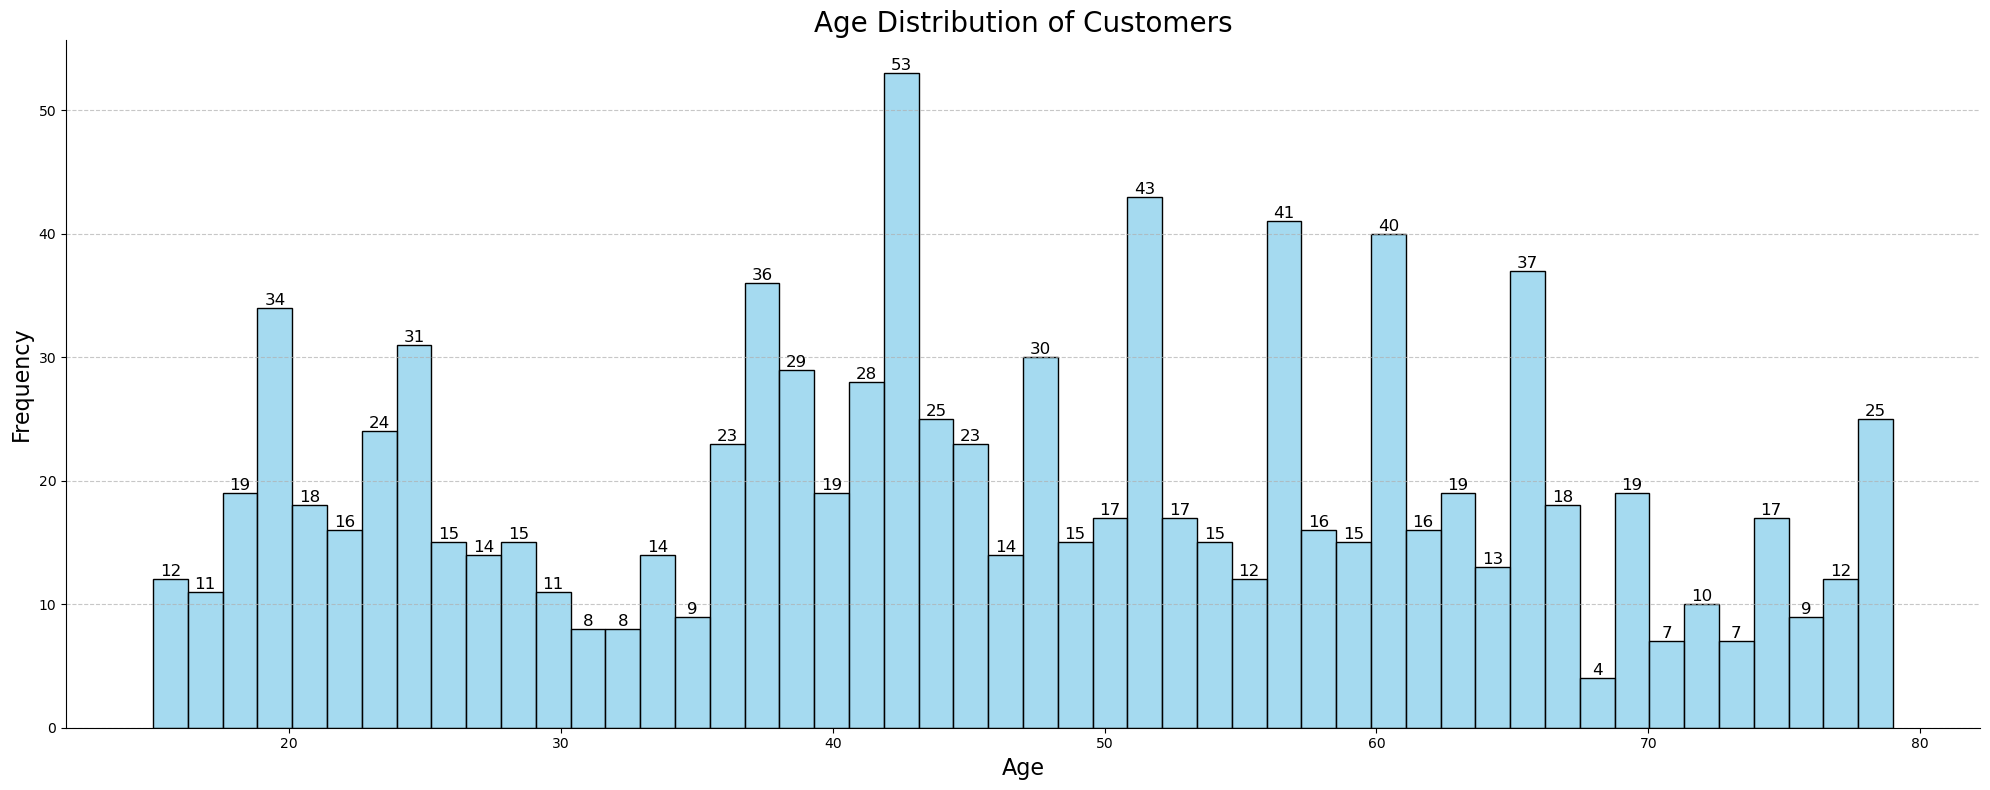

In [23]:
# Visualizing Age Distribution of Customers
plt.figure(figsize=(20, 8))

# Histogram for Age Distribution
sns.histplot(new_cust['age'], bins=50, kde=False, color='skyblue')

# Adding title and labels with larger font sizes
plt.title('Age Distribution of Customers', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Remove the top and right spines for a cleaner look
sns.despine()

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding number labels above each bar for better insights
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

**Looking at the age field there is no descripency in the data**

In [24]:
new_cust['age_group'] = new_cust['age'].apply(lambda x : (math.floor(x/10) + 1) * 10)

C:\Users\adamy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


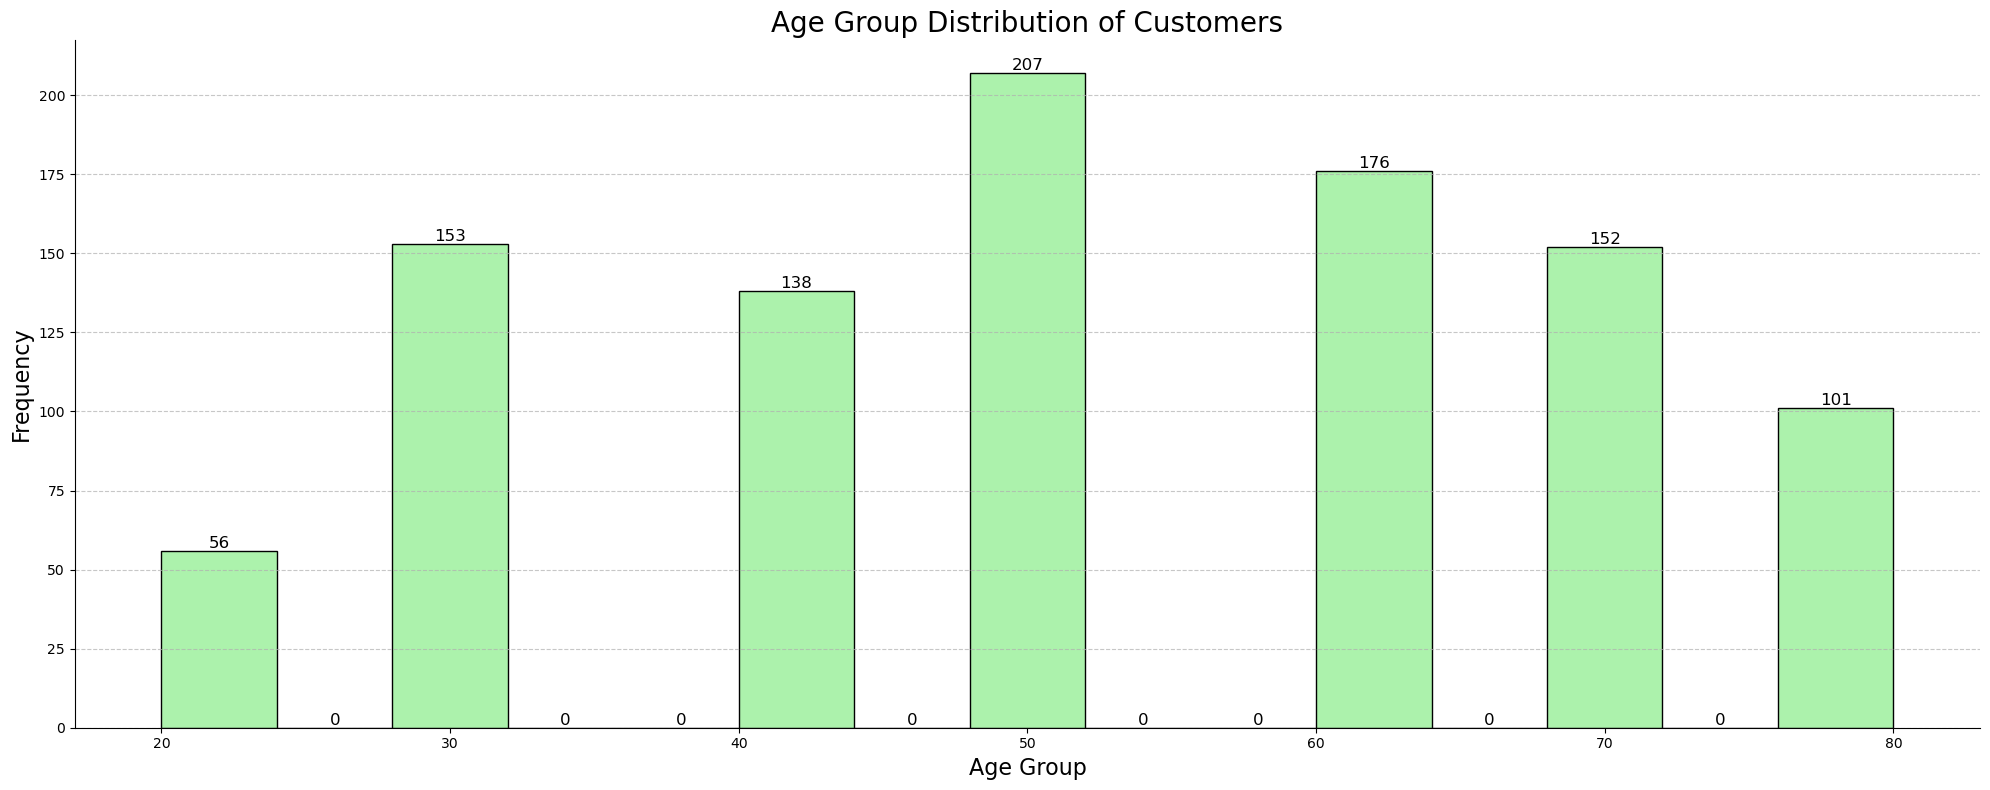

In [25]:
# Visualizing Age Group Distribution of Customers
plt.figure(figsize=(20, 8))

# Histogram for Age Group Distribution
sns.histplot(new_cust['age_group'], bins=15, kde=False, color='lightgreen')

# Adding title and labels with larger font sizes
plt.title('Age Group Distribution of Customers', fontsize=20)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Remove the top and right spines for a cleaner look
sns.despine()

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding number labels above each bar for better insights
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

The highest number of New Customers are from the Age Group **50-59**.

## 2.3 Job title

In [26]:
new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
15,Dukie,Swire,Male,88,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,63,70
25,Rourke,Gillbard,Male,11,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,72,80
29,Rhona,De Freyne,Female,45,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,57,60
30,Sharron,Claibourn,Female,62,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,37,40
37,Mitchell,MacCague,Male,58,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,38,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500,40,50
953,Noami,Cokly,Female,74,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,55,60
971,Frieda,Tavinor,Female,43,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,18,20
972,Ellwood,Budden,Male,82,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000,19,20


Since percentage of missing values for Job Title is **11%**. We will replace null values with **"Missing"**.

In [27]:
new_cust['job_title'].fillna('Missing', axis = 0, inplace = True)

In [28]:
new_cust['job_title'].isnull().sum()

0

Currently there are no missing values for **'job_title'** Column.

## 2.4 Job Industry Category 

In [29]:
new_cust[new_cust['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
22,Otis,Ottey,Male,26,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,19,20
23,Tabbatha,Averill,Female,5,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,40,50
33,Mikel,McNess,Male,71,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,36,40
36,Farlie,Petford,Male,76,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,49,50
43,Corinna,Suggey,Female,52,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,51,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,51,60
971,Frieda,Tavinor,Female,43,Missing,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,18,20
975,Amby,Bodega,Male,63,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,49,50
980,Tyne,Anshell,Female,71,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,25,30


Since Percentage of missing Job Industry Category is **16%**. We will replace null values with **"Missing"**.

In [30]:
new_cust['job_industry_category'].fillna('Missing', axis = 0, inplace = True)

In [31]:
new_cust['job_industry_category'].isnull().sum()

0

Currently there are no Missing values for **'job_industry_category'** column.

**Finally there are no Missing Values in the dataset.**

In [32]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
age_group                              0
dtype: int64

In [33]:
print("Total rows after removing missing values: {}".format(new_cust.shape[0]))

Total rows after removing missing values: 983


# 3. Inconsistency Check in Data

We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are **'gender'**, **'wealth_segment'**, **'deceased_indicator'**, **'owns_car'**

## 3.1 Gender

There is **no inconsistent data** in **'gender'** column.

In [34]:
new_cust['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

## 3.2 Wealth Segment

There is **no inconsistent data** in **'wealth_segment'** column.

In [35]:
new_cust['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

## 3.3 Deceased Indicator

There is **no inconsistent data** in **'deceased_indicator'** column.

In [36]:
new_cust['deceased_indicator'].value_counts()

deceased_indicator
N    983
Name: count, dtype: int64

## 3.4 Owns a Car

There is **no inconsistent data** in **'owns_car'** column.

In [37]:
new_cust['owns_car'].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

## 3.5 State

There is **no inconsistent data** in **'state'** column.

In [38]:
new_cust['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

## 3.6 Country

There is **no inconsistent data** in **'country'** column.

In [39]:
new_cust['country'].value_counts()

country
Australia    983
Name: count, dtype: int64

## 3.7 Postcode

There is **no inconsistent data** in **'postcode'** column.

In [40]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


## 3.8 Address

In [41]:
new_cust[['address', 'postcode', 'state', 'country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


## 3.9 Tenure

There is **no inconsistent data** in **'tenure'** column. The distribution of **tenure** looks fine.

In [42]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

C:\Users\adamy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


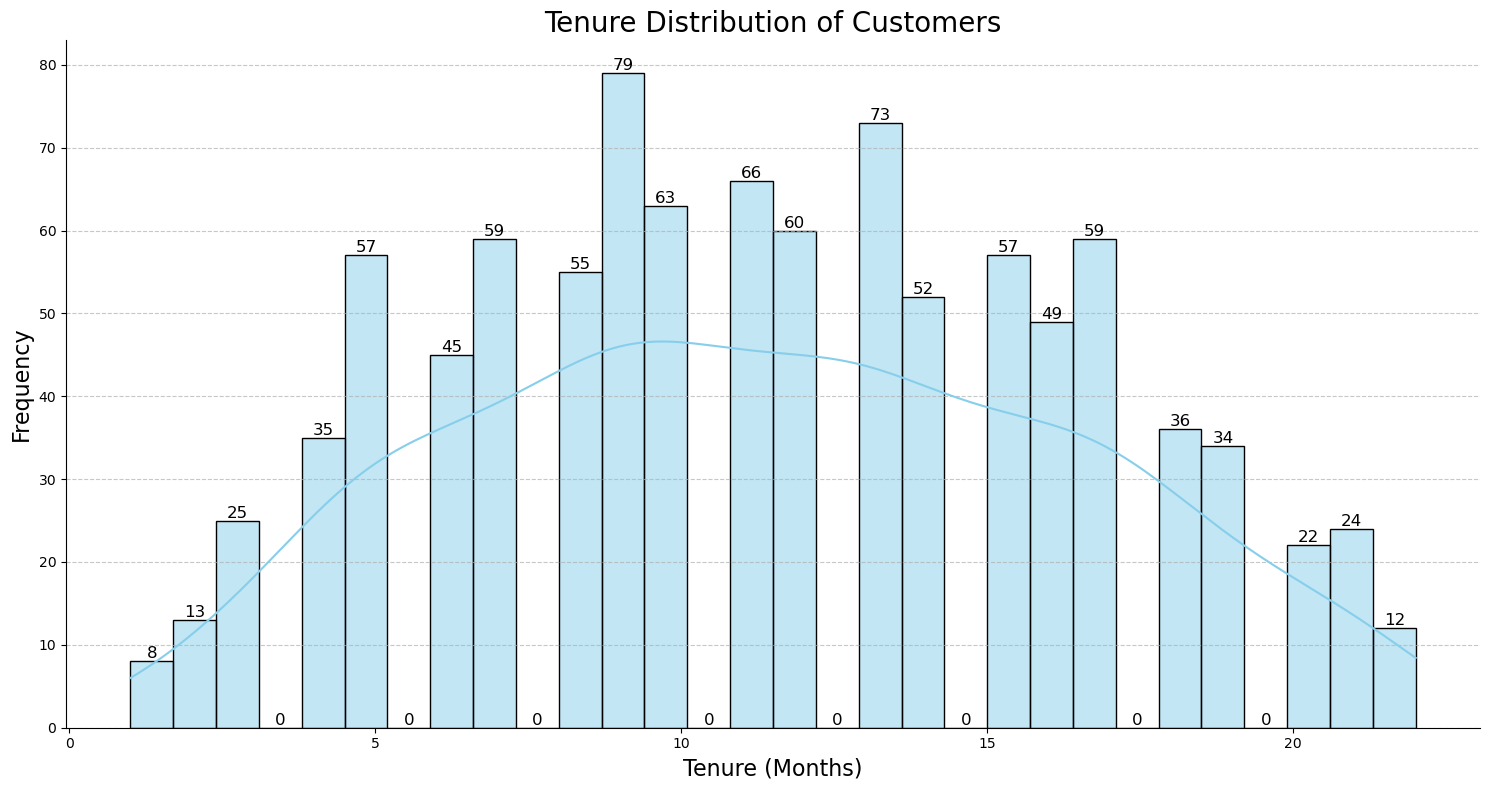

In [43]:
# Distribution of Tenure with KDE and frequency labels
plt.figure(figsize=(15, 8))

# Histogram with KDE (Kernel Density Estimate) for smoother visualization
sns.histplot(new_cust['tenure'], kde=True, bins=30, color='skyblue')

# Adding title and labels with larger font sizes
plt.title('Tenure Distribution of Customers', fontsize=20)
plt.xlabel('Tenure (Months)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Remove the top and right spines for a cleaner look
sns.despine()

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding number labels above each bar for better insights
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

# 4. Duplication Checks

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the **primary key** column of the dataset then apply **drop_duplicates()** function provided by Python.

In [44]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


**Since both the numbers are same. There are no duplicate records in the dataset.**

# 5. Columns order

In [45]:
new_column_order = ['first_name', 'last_name', 'gender', 'age', 'age_group','past_3_years_bike_related_purchases', 'job_title',
                    'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
                    'state', 'country', 'property_valuation', 'Rank', 'Value']

new_cust = new_cust[new_column_order]
new_cust.head()

,first_name,last_name,gender,age,age_group,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,60,70,86,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,47,50,69,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,43,50,10,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,38,40,64,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,52,60,34,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


# 6. Exporting the Cleaned New Customers Data Set to csv

In [46]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)